# K Nearest Neighbors "from scratch"
Since K Nearest Neighbors is a straightforward supervised learning algorithm, let's reinforce our understanding of it by writing our own version "from scratch."
# First, let's take a look at the sklearn version with fancy plots
The dataset is the classic iris dataset.  This dataset consists of three different subspecies of a species of flower, and a few measurements of these flowers, which can be used to classify them into their correct category.  Read through this code carefully, because we will be using it later, when we want to plot the results of our own kNN algorithm.

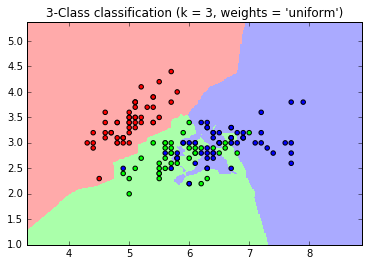

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import neighbors, datasets
import pandas as pd
from scipy.stats import mode

n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

weights = 'uniform'
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()

# Now, write your own kNN algorithm
We will use Euclidean distances.  The algorithm should take as input "k" (the number of neighbors), "X" (the features matrix, of shape (n_samples, n_features)), "y" (the target 1D array), and "test_X" (the samples we want to classify, of shape (m_samples, n_features), and return "classified_y" (a 1D array with the classifications, of shape (m_samples, 1)).

In [51]:
def euclideanDistance(vector1, vector2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    return (np.dot((vector1-vector2),(vector1-vector2)))**.5


def classify1(k, X, y, test_x):
    distance = [euclideanDistance(x, test_x) for x in X]
    yPlusDistance = zip(distance, y)
    df = pd.DataFrame(yPlusDistance, columns=["distance", "y"])
    df.sort_values(by="distance", inplace=True)
    dfKNearest = df[0:k]
    classification = mode(dfKNearest["y"])
    return classification[0][0]
    
def myKNN(k, X, y, test_X):
    classifed_y = []
    for test_x in test_X:
        classifed_y.append(classify1(k, X, y, test_x))
    return np.array(classifed_y)
classified_y = myKNN(n_neighbors, X, y, X)   
yPredictedY = zip(classified_y, y)
yPredictedY

success = np.sum([1 for yPredicted,y in yPredictedy if yPredicted == y])/float(len(yPredictedY))
success

0.80666666666666664

# Now, do a little copying and pasting from above, and verify that your algorithm produces identical results to the sklearn version for this data

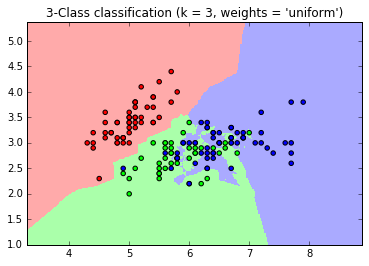

In [52]:
n_neighbors = 3

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

weights = 'uniform'
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = myKNN(n_neighbors, X, y, np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.show()